In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization

from tensorflow.keras.datasets import mnist

In [2]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()   

print('x_train.shape = ', x_train.shape, ', t_train.shape = ', t_train.shape)
print('x_test.shape = ', x_test.shape, ', t_test.shape = ', t_test.shape)

11501568/11490434 [==============================] - 1s 0us/step
x_train.shape =  (60000, 28, 28) , t_train.shape =  (60000,)
x_test.shape =  (10000, 28, 28) , t_test.shape =  (10000,)


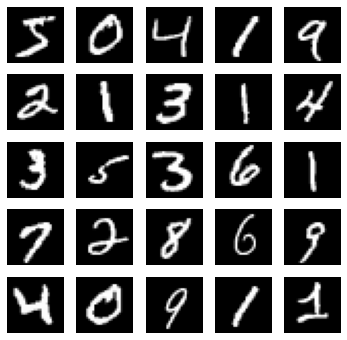

In [4]:
import matplotlib.pyplot as plt

# 48개의 이미지 출력
plt.figure(figsize=(6, 6))  # (6,1), (12,1), (12,6), (6,6) 등으로 다양하게 해본다

for index in range(25):    # 25 개 이미지 출력

    plt.subplot(5, 5, index + 1)  # 5행 5열 
    plt.imshow(x_train[index], cmap='gray')    # 1행 1열 -> 1행 2열 -> ...-> 1행 5열 -> 2행 1열 -> ...
    plt.axis('off')    

plt.show()

In [5]:
# x_train, x_test 값 범위를 0 ~ 1 사이로 정규화

x_train = x_train / 255.0
x_test = x_test / 255.0

Dropout(0.25)

In [38]:
model = Sequential()      # model 생성

model.add(Flatten(input_shape=(28, 28, 1)))  

model.add(Dense(100, activation='relu'))    

model.add(Dropout(0.25))  # Dropout() 추가

model.add(Dense(10, activation='softmax'))

In [39]:
from tensorflow.keras.optimizers import SGD

model.compile(optimizer=SGD(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [40]:
hist = model.fit(x_train, t_train, epochs=50, validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.8353 - accuracy: 0.7650 - val_loss: 0.3954 - val_accuracy: 0.8977
Epoch 2/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4393 - accuracy: 0.8747 - val_loss: 0.3149 - val_accuracy: 0.9149
Epoch 3/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3673 - accuracy: 0.8949 - val_loss: 0.2773 - val_accuracy: 0.9230
Epoch 4/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3291 - accuracy: 0.9051 - val_loss: 0.2535 - val_accuracy: 0.9302
Epoch 5/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3009 - accuracy: 0.9127 - val_loss: 0.2345 - val_accuracy: 0.9344
Epoch 6/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2776 - accuracy: 0.9201 - val_loss: 0.2191 - val_accuracy: 0.9390
Epoch 7/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2639 - accuracy: 0.9246 - val_loss: 0.2069 - val_accuracy:

In [41]:
# test data 이용하여 정확도 검증

model.evaluate(x_test, t_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0923 - accuracy: 0.9713


[0.09233701974153519, 0.9713000059127808]

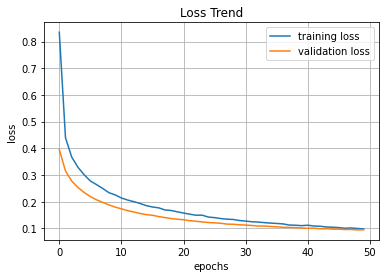

In [42]:
# 손실함수 그래프

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

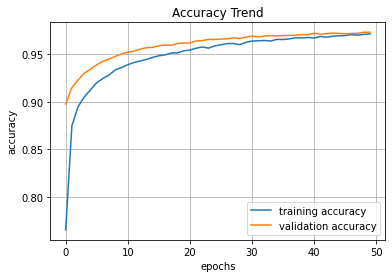

In [43]:
# 정확도 함수 그래프

plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

Dropout(0.5)

In [26]:
model = Sequential()      # model 생성

model.add(Flatten(input_shape=(28, 28, 1)))  

model.add(Dense(100, activation='relu'))    

model.add(Dropout(0.5))  # Dropout() 추가

model.add(Dense(10, activation='softmax'))

In [27]:
from tensorflow.keras.optimizers import SGD

model.compile(optimizer=SGD(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [28]:
hist = model.fit(x_train, t_train, epochs=50, validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.9670 - accuracy: 0.7109 - val_loss: 0.4315 - val_accuracy: 0.8914
Epoch 2/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5395 - accuracy: 0.8417 - val_loss: 0.3343 - val_accuracy: 0.9098
Epoch 3/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4542 - accuracy: 0.8692 - val_loss: 0.2949 - val_accuracy: 0.9169
Epoch 4/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4060 - accuracy: 0.8848 - val_loss: 0.2675 - val_accuracy: 0.9260
Epoch 5/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3705 - accuracy: 0.8941 - val_loss: 0.2449 - val_accuracy: 0.9313
Epoch 6/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3497 - accuracy: 0.9001 - val_loss: 0.2299 - val_accuracy: 0.9365
Epoch 7/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3272 - accuracy: 0.9064 - val_loss: 0.2165 - val_accuracy:

In [29]:
# test data 이용하여 정확도 검증

model.evaluate(x_test, t_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1043 - accuracy: 0.9681


[0.10431912541389465, 0.9681000113487244]

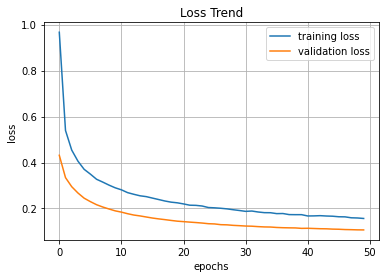

In [30]:
# 손실함수 그래프

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

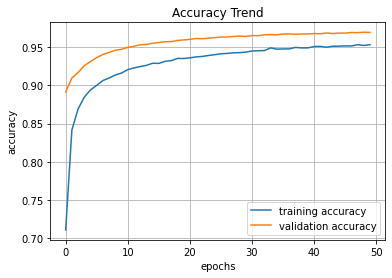

In [31]:
# 정확도 함수 그래프

plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

Dropout(0.75)

In [44]:
model = Sequential()      # model 생성

model.add(Flatten(input_shape=(28, 28, 1)))  

model.add(Dense(100, activation='relu'))    

model.add(Dropout(0.75))  # Dropout() 추가

model.add(Dense(10, activation='softmax'))

In [45]:
from tensorflow.keras.optimizers import SGD

model.compile(optimizer=SGD(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [46]:
hist = model.fit(x_train, t_train, epochs=50, validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 4s 3ms/step - loss: 1.2168 - accuracy: 0.6037 - val_loss: 0.5034 - val_accuracy: 0.8859
Epoch 2/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7651 - accuracy: 0.7611 - val_loss: 0.3812 - val_accuracy: 0.9018
Epoch 3/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6593 - accuracy: 0.7984 - val_loss: 0.3307 - val_accuracy: 0.9094
Epoch 4/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6019 - accuracy: 0.8163 - val_loss: 0.3000 - val_accuracy: 0.9178
Epoch 5/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5631 - accuracy: 0.8295 - val_loss: 0.2799 - val_accuracy: 0.9217
Epoch 6/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5400 - accuracy: 0.8379 - val_loss: 0.2633 - val_accuracy: 0.9268
Epoch 7/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5162 - accuracy: 0.8461 - val_loss: 0.2548 - val_accuracy:

In [47]:
# test data 이용하여 정확도 검증

model.evaluate(x_test, t_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1481 - accuracy: 0.9574


[0.14811928570270538, 0.9574000239372253]

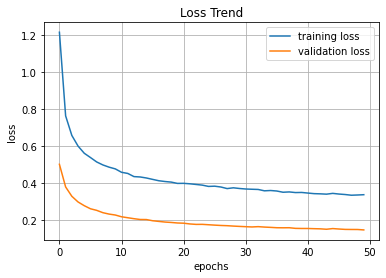

In [48]:
# 손실함수 그래프

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

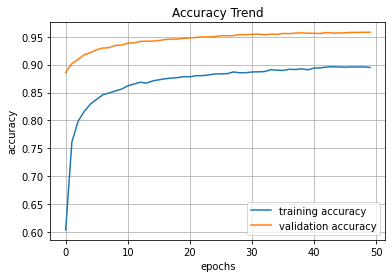

In [49]:
# 정확도 함수 그래프

plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()